# Welcome to All About Confusion Matrix 🌟

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    Welcome back! If you are new here, I'm currently a computer science student, an avid number nerd, an aspiring researcher who publishes <a href="https://www.kaggle.com/code/kimmik123/all-about-linear-regression">notebooks on certain topics</a> that I hope can guide and inspire beginners throughout their journey in Kaggle and beyond. 
</p>
</div>

### Today, I thought of introducing the fundamental idea of a confusion matrix and the terminalogies tagging along with it. 
### This is an important knowledge for any aspiring data scientist, machine learning practioners, etc... 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>What is it?</b>
</p>
</div>

### Confusion matrix by itself is a visualization tool, crucial in helping users understand the results of one's predictions and the algorithm used to generate those results. 
### It showcases features such as Recall, Precision, Specificity, Accuracy and can even use these numbers to calculate the AUC-ROC score. 
### For now, this will all sound foreign to you and sometimes it still does to me. 
### But I'm hoping that after this notebook, you'll realize the power behind this tool and the different perspective you can obtain. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Why is it important?</b>
</p>
</div>

### For those first starting out in this field and within the classification problem spectrum, people will simply be satisfied from their accuracy scores that their model shows. 
### Accuracy score is definitely one of the fundamental calculations to access the model's performance. 
### However, it only shows you facts on the surface and not the hidden meanings that you could easily miss.

### This is especially so in the field of medicine or business. 
### Sometimes, our models' predictions of features may not be correct all the way. 
### Sometimes, our models might predict a certain observation as positive but it may turn our negative, which is known as False Positive (FP) and the vice versa would be called False Negative (FN). 
### In the medical field, this one simple mistake can possibly cost a patient's life. 
### If his cancer test returns as negative, but he infact had cancer, the test would have resulted in False Negative and the patient would have missed out on his chance to treat his illness before it worsens. 
### Mistakes like this are hard to sought after by using mere accuracy figures. 
### That is where this tool known as confusion matrix comes into place and assists us. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Details behind this tool</b>
</p>
</div>

### Now, let's observe what this matrix actually looks like. 

<div style="width:100%;text-align: center;"> 
<img align=middle src="https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png" style="width:30%;height:30%;margin:auto;"> 
</div>

### Let's clear up some terminologies first. 
### We can observe that there are 4 boxes and in each of them, there are abbreviations written. 

### TP means True Positive, meaning that we predicted the label correctly as being Positive. 
### FP means False Positive, meaning we predicted it as Positive but the actual label is Negative. 
### FN means False Negative, meaning we predicted it as Negative but the actual label is Positive. 
### TN means True Negative, meaning that we predicted the label correctly as being Negative.

### Using these values, we can calculate some useful variables. 
### Recall, refers to how many we predicted correctly from all the positive classes.

$$\LARGE \frac{TP}{TP + FN} $$

### Precision refers to how many are actually positive from all the classes we predicted as positive. 

$$\LARGE \frac{TP}{TP+FP} $$

### Accuracy refers to how many we predicted correctly from all the classes.

$$\LARGE \frac{TP+TN}{TP+TN+FP+FN} $$

### Apart from these calculations, we also have an important major function known as the ROC (Receiver Operating Characteristic) curve. 
### This is a plot between 2 parameters, the TP rate (recall) and the FP rate (specificity).
### Using different classification thresholds, these two parameters are plotted out. 
### After which, the area under the curve (AUC) is taken using integration. 
### This score is generally favored when it is close to 1, meaning the model is able to separate between the 2 classes perfectly while 0 means the opposite. 

### Let's try and see this in action.

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Example</b>
</p>
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing in data 
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df['class'].unique()

array(['p', 'e'], dtype=object)

### We are trying to predict the type of mushroom and there are 2 types of different mushrooms in this dataset. 

### Before we apply our model (XGBClassifier), we would have to convert all the categorical columns into numerical figures.

In [4]:
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix

# Converting
oe = OrdinalEncoder()
convert_df = pd.DataFrame(oe.fit_transform(df), columns = list(df.columns))

#Train test split 
train_df = convert_df.iloc[:5000]
test_df = convert_df.iloc[5000:]

model = xgb.XGBClassifier()

y = 'class'
X = list(df.columns[1:])

# Model fitting and predicting
model.fit(train_df[X], train_df[y])
pred = model.predict(test_df[X])

# Confusion Matrix
cm = confusion_matrix(test_df[y], pred)
print(cm)

[[ 717   48]
 [  44 2315]]


### With the help of matplotlib, we can easily plot a more beautiful visualization to show the confusion matrix.

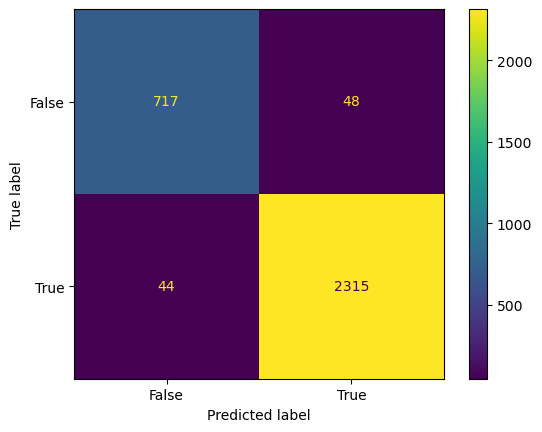

In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

### As we can see, it shows us the values for the 4 boxes.
### For our model, we see that it has pretty stellar performance. 
### However, it still came up with a few False Negative and False Positive observations. 
### Now, let us check the AUC score for this model.

In [6]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(test_df[y], model.predict_proba(test_df[X])[:, 1])

print(f"The score is: {score:.3f}")

The score is: 0.983


### Given the simple nature of this dataset and the robust performance of the XGBClassifier model, it is not surprising that the score is extremely high, almost close to 0.99 which is very impressive. 
### This explains the lack of observations for the False observations. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Conclusion</b>
</p>
</div>

### Hopefully you got the whole idea of this confusion matrix. 
### It is definitely an fundamental tool to understand.
### Make sure to understand the other ideas such as Recall and Precision too. 
### If you enjoyed this, an upvote would go a long way! 
### Cheers and see you in the next one! 